In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def hex_to_int(x):
    return int(x, 16)

input_file = 'merged_data.csv'

In [3]:
def load_data(test_split = 0.2):
    print ('Loading data...')
    df = pd.read_csv(input_file)
    train_size = int(len(df) * (1 - test_split))
    df['SHA1'] = df['SHA1'].apply(hex_to_int)

    select_features=['BaseOfCode','BaseOfData','Characteristics','Entropy','FileAlignment',
                     'ImageBase','Machine','Magic',
                     'NumberOfRvaAndSizes','NumberOfSections','NumberOfSymbols','PE_TYPE',
                     'PointerToSymbolTable','SHA1','Size','SizeOfCode','SizeOfHeaders','SizeOfImage',
                     'SizeOfInitializedData','SizeOfOptionalHeader','SizeOfUninitializedData',
                     'TimeDateStamp']
    select_df = df[select_features]
    X_train = select_df.values[:train_size]
    y_train = np.array(df['label'].values[:train_size])
    X_test = np.array(select_df.values[train_size:])
    y_test = np.array(df['label'].values[train_size:])

    return X_train, y_train, X_test, y_test

In [4]:
def _plot_model():
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    sns.heatmap(metrics.confusion_matrix(y_test, y_prediction),
            cmap="GnBu", square=True, ax=ax)
    ax.set_title('Heatmap: Confusion Matrix for \nKNN Classifier Model')
    ax.set_xlabel('Predicted ')
    ax.set_ylabel('Actual ')
    plt.show()

def get_metrices():
    print (metrics.classification_report(y_test, y_prediction))

Loading data...
KNeighborsClassifier(n_neighbors=2)
0.5
              precision    recall  f1-score   support

           0       0.50      0.76      0.60        99
           1       0.51      0.25      0.33       101

    accuracy                           0.50       200
   macro avg       0.50      0.50      0.47       200
weighted avg       0.50      0.50      0.47       200



C:\Users\chich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\chich\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

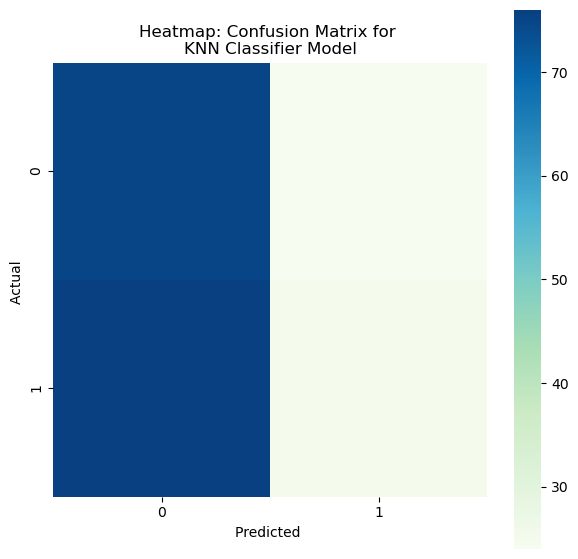

In [5]:
X_train, y_train, X_test, y_test = load_data()

#training Step
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train, y_train)
print(knc)


y_prediction = knc.predict(X_test)
print (knc.score(X_test,y_test))

get_metrices()

_plot_model()
